In [70]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sample dataset (you can replace this with your own dataset)
# Let's create a DataFrame with random data for demonstration
np.random.seed(42)
df = pd.DataFrame({
    'feature1': np.random.rand(4),
    'feature2': np.random.rand(4),
    'feature3': np.random.rand(4),
})
df


# marks = np.array([[3,4], [2,8], [6,9]])
# df = pd.DataFrame(marks, columns=['physics', 'maths'])
# print(df)

,feature1,feature2,feature3
0,0.374540,0.156019,0.601115
1,0.950714,0.155995,0.708073
2,0.731994,0.058084,0.020584
3,0.598658,0.866176,0.969910


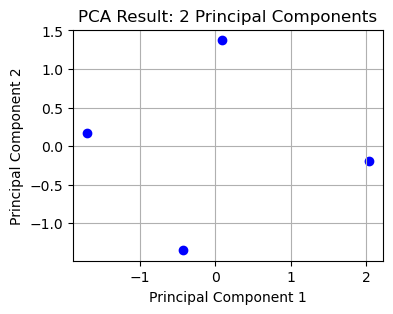

Explained variance by component: [0.60123496 0.31504495]


,PC1,PC2
0,0.089672,1.373088
1,-0.427152,-1.351036
2,-1.697723,0.175558
3,2.035204,-0.197610


In [77]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 2: Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(scaled_data)

# Step 3: Create a DataFrame for the PCA result
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Step 4: Plot the results
plt.figure(figsize=(4, 3))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', marker='o')
plt.title('PCA Result: 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# Step 5: Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by component: {explained_variance}')
pca_df


mean = array([0.66397671, 0.30906823, 0.57492048])
after scaling X = 
 [[-1.38422726 -0.47219862  0.07548192]
 [ 1.37131932 -0.47227303  0.38368991]
 [ 0.32529163 -0.77435418 -1.59736973]
 [-0.31238369  1.71882583  1.1381979 ]]
covariance matrix = 
 [[ 1.33333333 -0.26094368 -0.15116274]
 [-0.26094368  1.33333333  0.99214835]
 [-0.15116274  0.99214835  1.33333333]]
eigen_values = 
 [2.40493982 1.26017982 0.33488036]
eigen_vectors = 
 [[ 0.26305685 -0.96137871 -0.08094485]
 [-0.68916346 -0.12853014 -0.71311551]
 [-0.67517021 -0.24337416  0.69635781]]
sorted_indices = array([0, 1, 2])
[[-0.08967158  0.42715227  1.69772327 -2.03520395]
 [ 1.37308802 -1.35103609  0.17555791 -0.19760985]]
[[-0.08967158  1.37308802]
 [ 0.42715227 -1.35103609]
 [ 1.69772327  0.17555791]
 [-2.03520395 -0.19760985]]


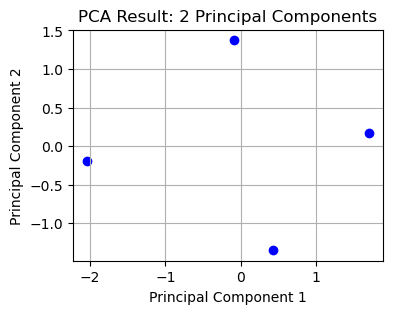

In [80]:
class PCA:
    
    def __init__(self, n_components):
        self.n_components = n_components
        
    def mean_centric(self, X):
        mean = np.mean(X.T, axis=1)
        std = np.std(X.T, axis=1)
        print(f"{mean = }")
        return (X - mean) /std
        
    def covariance(self, X):
        return np.cov(X.T)
    
    def eigen_values_and_eigenvectors(self, X):
        eigen_values, eigen_vectors = np.linalg.eig(X)
        print("eigen_values = \n", eigen_values)
        print("eigen_vectors = \n", eigen_vectors)
        return eigen_values, eigen_vectors
    
    def sort_eigen_values(self, eigen_values, eigen_vectors):
        sorted_indices = np.argsort(eigen_values)[::-1]
        print(f"{sorted_indices = }")
        sorted_eigen_values = eigen_values[sorted_indices]
        sorted_eigen_vectors = eigen_vectors[:, sorted_indices]
        return sorted_eigen_values, sorted_eigen_vectors
    
    def fit(self, X):
        X_mean_centric = self.mean_centric(X)
        print("after scaling X = \n", X_mean_centric)
        cov = self.covariance(X_mean_centric)
        print("covariance matrix = \n", cov)
        eigen_values, eigen_vectors = self.eigen_values_and_eigenvectors(cov)
        eigen_values, eigen_vectors = self.sort_eigen_values(eigen_values, eigen_vectors)
        selected_eigen_vectors = eigen_vectors[:, :self.n_components]
        
        project_data = np.dot(X_mean_centric, selected_eigen_vectors)
        print(project_data.T)
        return project_data
    
    def fit_svd(self, X):
        X_mean_centric = self.mean_centric(X)
        U, S, Vt = np.linalg.svd(X_mean_centric, full_matrices=False)
        pca_svd = U[:, :self.n_components]
        return pca_svd
        
    def plot(self, X):
        print(X)
        # Step 4: Plot the results
        plt.figure(figsize=(4, 3))
        plt.scatter(X.T[0], X.T[1], c='blue', marker='o')
        plt.title('PCA Result: 2 Principal Components')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.grid()
        plt.show()
        
 
my_pca = PCA(n_components=2)
my_pca_res = my_pca.fit(df.values)
my_pca.plot(my_pca_res)


In [74]:
pca_df

# 1. (2 pts) Dimension reduction using principal component analysis (PCA)

## If the data is highly dimensional, you can use PCA to find a reduced-rank approximation of the data that can be visualized easily.

### 1.1(1pt) Using Singular-Value Decomposition (SVD) method, please decompose 1st and 2nd principal components and project them to the data.

    - Please draw 2D plot using the 1st and 2nd principal components.
    - Please legend different colors for the 10 labels in the graph.

### 1.2(1pt) As we discussed during the class, we can compress images using PCA. 𝐴 ≈ 𝑈𝑘∑𝑘𝑉 𝑘𝑇

    - Please select 10 images. The selected images should have different labels. Please compress the images using k=2, 5, 10. Then, visualize the original images and the compressed images with different k.

In [95]:
### GPT
df = pd.read_csv('fashion_mnist1.csv')
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
print(f"{X.shape = }, {y.shape = }")
y

X.shape = (10000, 784), y.shape = (10000,)


array([5, 7, 6, ..., 5, 2, 7])

## Library

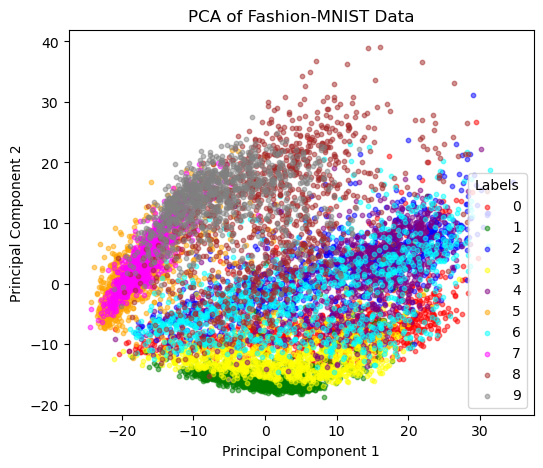

In [117]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Step 2: Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(scaled_data)

# Step 3: Create a DataFrame for the PCA result
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'gray']

plt.figure(figsize=(6,5))
for i in range(10):
    idx = y == i
    plt.scatter(pca_result[idx, 0], pca_result[idx, 1], c=colors[i], label=str(i), s=10, alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Labels')
plt.title('PCA of Fashion-MNIST Data')
plt.show()

## My Code

https://towardsdatascience.com/svd-in-machine-learning-pca-f25cf9b837ae

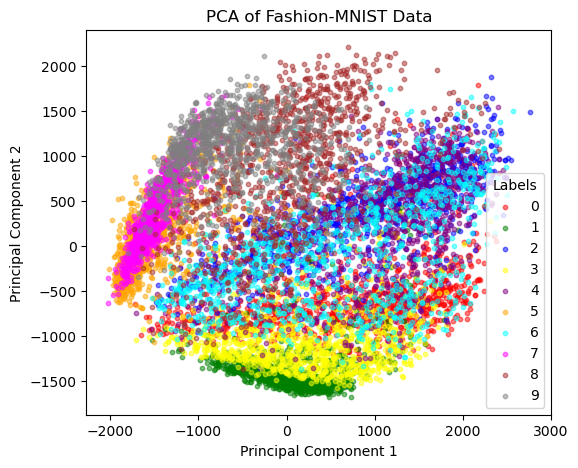

In [110]:
# Center the data by subtracting the mean
X_mean = np.mean(X, axis=0)
X_centered = (X - X_mean) 

# X_std = np.std(X, axis=0)
# X_centered = (X - X_mean) / X_std

# Perform SVD
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

# Project the data onto the first two principal components
PCs = Vt[:2, :]
projected_data = np.dot(X_centered, PCs.T)
# projected_data = U[:, :2]
# Define colors for each label
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'gray']

plt.figure(figsize=(6,5))
for i in range(10):
    idx = y == i
    plt.scatter(projected_data[idx, 0], projected_data[idx, 1], c=colors[i], label=str(i), s=10, alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Labels')
plt.title('PCA of Fashion-MNIST Data')
plt.show()

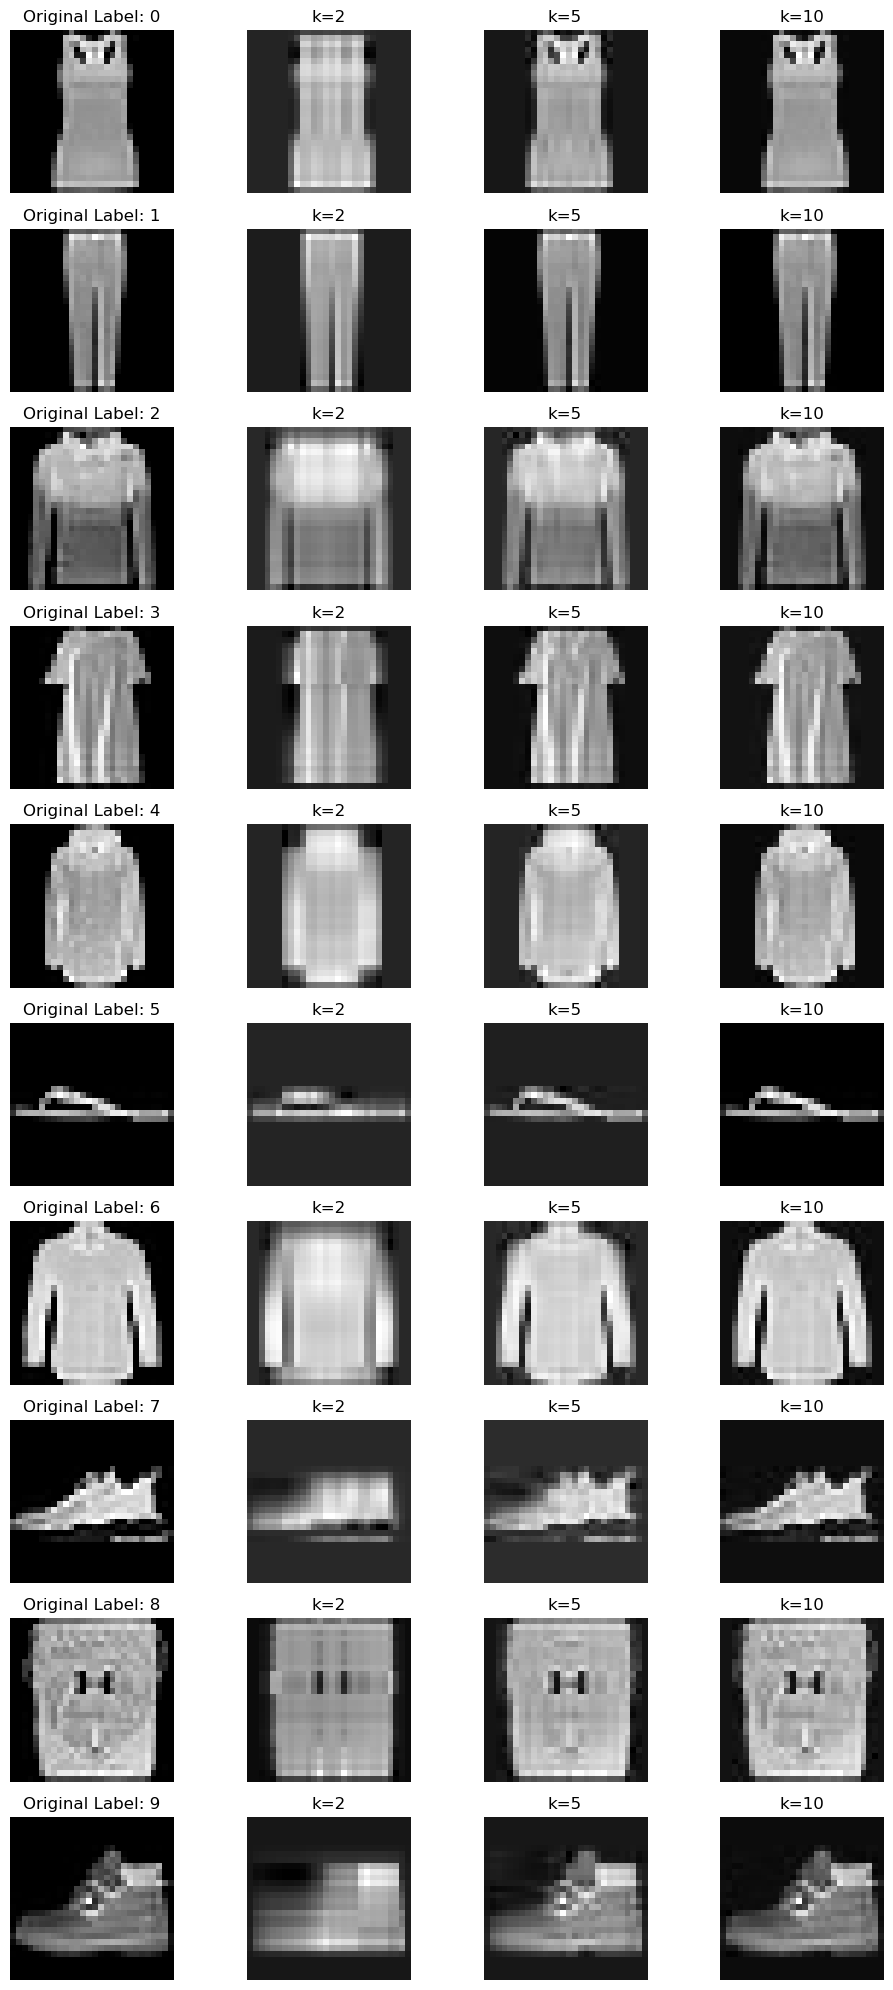

In [118]:
selected_images = []
selected_labels = []

images, labels = X, y
for i in range(10):
    idx = np.where(labels == i)[0][0]  # Index of the first occurrence of label i
    selected_images.append(images[idx])
    selected_labels.append(labels[idx])
    
image_matrices = [img.reshape(28,28) for img in selected_images]


k_values = [2, 5, 10]
reconstructed_images = []

for img in image_matrices:
    U, S, Vt = np.linalg.svd(img, full_matrices=False)
    img_reconstructions = []
    for k in k_values:
        # Keep the first k singular values/components
        U_k = U[:, :k]
        S_k = S[:k]
        Vt_k = Vt[:k, :]
        # Reconstruct the image
        img_reconstructed = np.dot(U_k, np.dot(np.diag(S_k), Vt_k))
        img_reconstructions.append(img_reconstructed)
    reconstructed_images.append(img_reconstructions)

fig, axes = plt.subplots(nrows=10, ncols=4, figsize=(10, 20))

for i in range(10):
    # Original image
    axes[i,0].imshow(image_matrices[i], cmap='gray')
    axes[i,0].set_title('Original Label: {}'.format(selected_labels[i]))
    axes[i,0].axis('off')
    # Reconstructed images
    for j, k in enumerate(k_values):
        axes[i,j+1].imshow(reconstructed_images[i][j], cmap='gray')
        axes[i,j+1].set_title('k={}'.format(k))
        axes[i,j+1].axis('off')

plt.tight_layout()
plt.show()

    